# Plantillas desde SXS
Primero instalamos la libreria sxs `!pip install sxs -q`

In [ ]:
!pip install sxs -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/224.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.2/784.2 kB 25.7 MB/s eta 0:00:00


In [ ]:
import sxs # import sxs
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%config InlineBackend.figure_format = 'retina'

In [ ]:
sxs_bbh_0305 = sxs.load("SXS:BBH:0305")
w = sxs_bbh_0305.h

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


  0%|          | 0/5589954 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/1793186 [00:00<?, ?it/s]

`w.metadata` los datos de los datos

In [ ]:
print('tipo de objetos: '+w.metadata.object_types)

tipo de objetos: BHBH


In [ ]:
t0 = w.metadata.reference_time # tiempo de referencia, al inicio hay "junk radiation"
print(f't0 = {t0}')

t0 = 1375.5


In [ ]:
w.data # todos los multipolos

array([[-6.08756498e-02-1.03749838e-02j, -2.41767934e-03+1.33542406e-02j,
        -1.64394083e-03-3.75265786e-06j, ...,
        -2.95725132e-04+5.22237916e-04j,  2.78079796e-03+8.29943753e-04j,
         2.50602698e-04+1.68353454e-04j],
       [-6.40735522e-02-1.31167911e-02j, -3.48002319e-03+9.32264275e-03j,
        -5.03610157e-03-2.31076443e-06j, ...,
        -2.15370243e-04+1.19481812e-03j,  1.34881910e-03-4.17077557e-04j,
        -5.37740065e-05-7.94640111e-05j],
       [-6.65156314e-02-1.56924548e-02j, -2.53493403e-03+2.19838273e-03j,
        -8.05778633e-03-1.64970492e-06j, ...,
        -2.06140344e-06+1.43353933e-03j, -4.14711405e-04-1.28144381e-03j,
        -3.42189973e-04-2.59264884e-04j],
       ...,
       [ 4.79523837e-05+1.28127898e-04j, -8.09173930e-08+7.91554779e-08j,
         8.01785441e-02+1.89402223e-10j, ...,
         5.08097345e-08-3.34875639e-08j, -1.04881552e-09+1.11191059e-09j,
        -7.08001448e-08+3.99441588e-08j],
       [ 4.78265201e-05+1.28176042e-04j, -8.

In [ ]:
print(w.data.ndim)

2


In [ ]:
ell, m = 2 , 2 # seleccionar el multipolo
i22 = w.index(ell, m) # seleccionar el indice del multipolo correspondiente
print(i22)
# guardar la onda 2 2 en w_2_2
w_2_2 = w[:, i22]

4


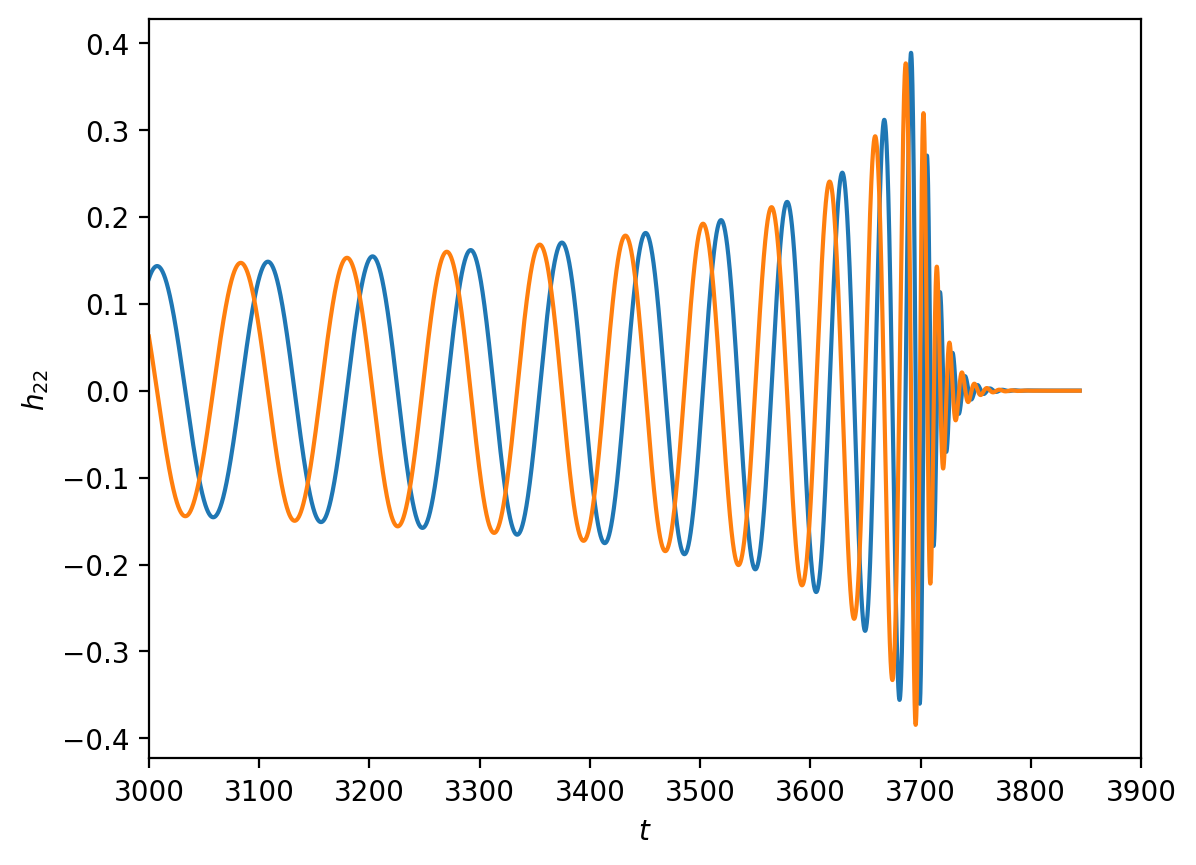

In [ ]:
plt.figure()
plt.plot(w.t, np.real(w_2_2))
plt.plot(w.t, np.imag(w_2_2))
plt.xlim(3000,3900)
plt.xlabel(r'$t$')
plt.ylabel(r'$h_{22}$')
plt.show()

In [ ]:
phi = np.angle(w_2_2)

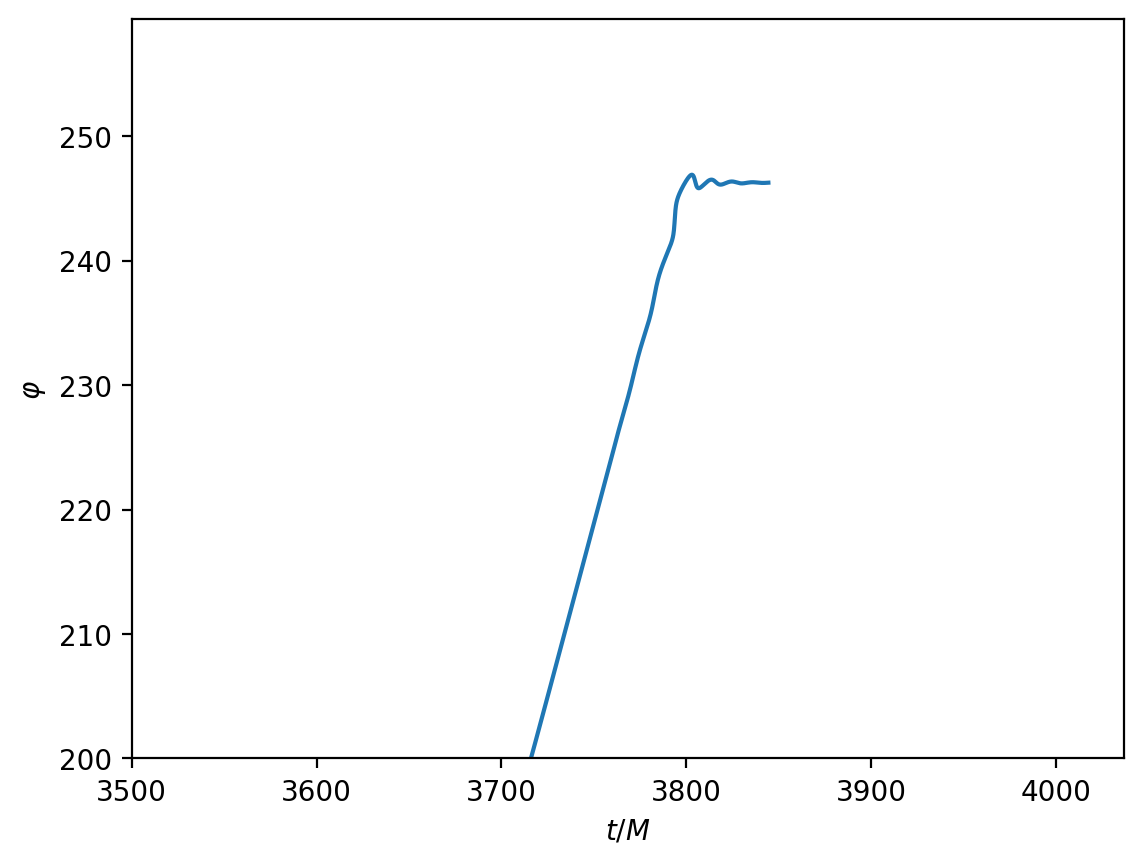

In [ ]:
#plt.plot(w_2_2.t, -phi)
plt.plot(w_2_2.t, np.unwrap(-phi))
#plt.plot(w_2_2.t, -phi)
plt.xlabel(r'$t/M$')
plt.xlim(3500,)
plt.ylim(200,)
plt.ylabel(r'$\varphi$')
plt.show()

In [ ]:
# Extraer datos relevantes de los metadatos
md = w.metadata

m1 = md.get('initial_mass1', None)
m2 = md.get('initial_mass2', None)
q  = md.get('initial_mass_ratio', None)

spin1 = md.get('initial_dimensionless_spin1', None)
spin2 = md.get('initial_dimensionless_spin2', None)

#gracias gpt, esto si no entendía como xd

m_rem = md.get('remnant_mass', None)
spin_rem = md.get('remnant_dimensionless_spin', None)

# Imprimir resumen
print("=== (1) Resumen del sistema físico ===")
print(f"Objetos: {md.get('object_types','Desconocido')} (binario de agujeros negros)")
print(f"Masas iniciales: m1 = {m1:.3f}, m2 = {m2:.3f} (normalizadas, M_total ≈ 1)")
print(f"Relación de masas q = {q:.3f}")
print(f"Espín adimensional BH1 = {spin1}")
print(f"Espín adimensional BH2 = {spin2}")
print(f"Masa del remanente = {m_rem:.3f}")
print(f"Espín del remanente = {spin_rem}")

=== (1) Resumen del sistema físico ===
Objetos: BHBH (binario de agujeros negros)
Masas iniciales: m1 = 0.550, m2 = 0.450 (normalizadas, M_total ≈ 1)
Relación de masas q = 1.221
Espín adimensional BH1 = [3.2772e-12, -9.165e-13, 0.3300000041229183]
Espín adimensional BH2 = [-2.778e-13, -1.44e-13, -0.4400000049306194]
Masa del remanente = 0.952
Espín del remanente = [5.253958683511938e-08, -2.4567336559285058e-08, 0.6920851868170271]


In [ ]:
time = w.t
fase = np.unwrap(-phi)
#t = np.linspace(time[1375.5], t_data[4000], 200)

In [ ]:
print("(2.1) Número total de puntos:", len(time))

(2.1) Número total de puntos: 13746


In [ ]:
print("(2.2)")
print("Tiempo mínimo:", time.min())
print("Tiempo máximo:", time.max())
print("Fase mínima:", fase.min())
print("Fase máxima:", fase.max())

(2.2)
Tiempo mínimo: 0.4802217393588517
Tiempo máximo: 3844.4210478262476
Fase mínima: -2.972864350400939
Fase máxima: 246.89628047391062


In [ ]:
diff_time = np.diff(time)

#Esto en cambio fue con geminis :v

print("Promedio del paso temporal:", diff_time.mean())
print("Desviación estándar del paso:", diff_time.std())

if np.allclose(diff_time, diff_time[0], rtol=1e-6, atol=1e-9):
    print("✅ El paso temporal es constante.")
else:
    print("⚠️ El paso temporal NO es constante.")

Promedio del paso temporal: 0.2796610277254921
Desviación estándar del paso: 0.27025585441853883
⚠️ El paso temporal NO es constante.


In [ ]:
print("""
Con Python respondemos así:
- len(time)  → número de datos
- min() y max() → valores mínimo y máximo de tiempo/fase
- np.diff(time) → diferencias entre tiempos consecutivos
- mean() y std() → promedio y desviación estándar del paso temporal
""")


Con Python respondemos así:
- len(time)  → número de datos
- min() y max() → valores mínimo y máximo de tiempo/fase
- np.diff(time) → diferencias entre tiempos consecutivos
- mean() y std() → promedio y desviación estándar del paso temporal



In [ ]:
idx_max= np.argmax(fase)
time[idx_max]

np.float64(3803.023715892821)

In [ ]:
idx_min= np.argmin(fase)
time[idx_min]

np.float64(0.4802217393588517)

=== Variante 1: Pares vs Impares ===
Train: 6873 | Test: 6873
MSE: 6.87519272220405e-10
MAE: 9.684261256328458e-07


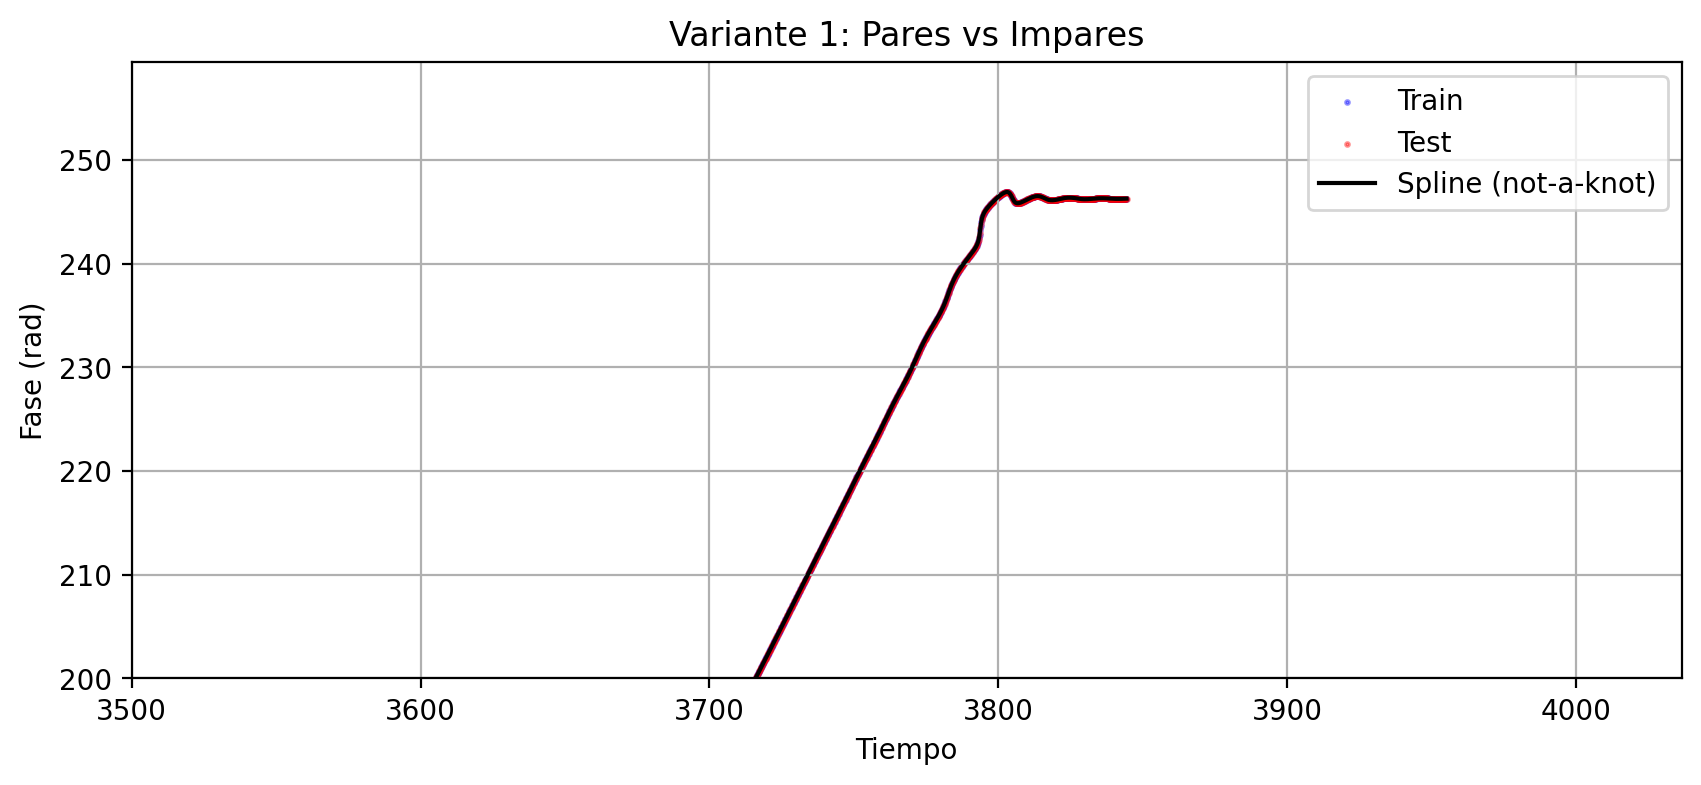


=== Variante 2: Entrenamiento entre min y max ===
Train: 13332 | Test: 414
MSE: 755010.1304205798
MAE: 582.1141873444393


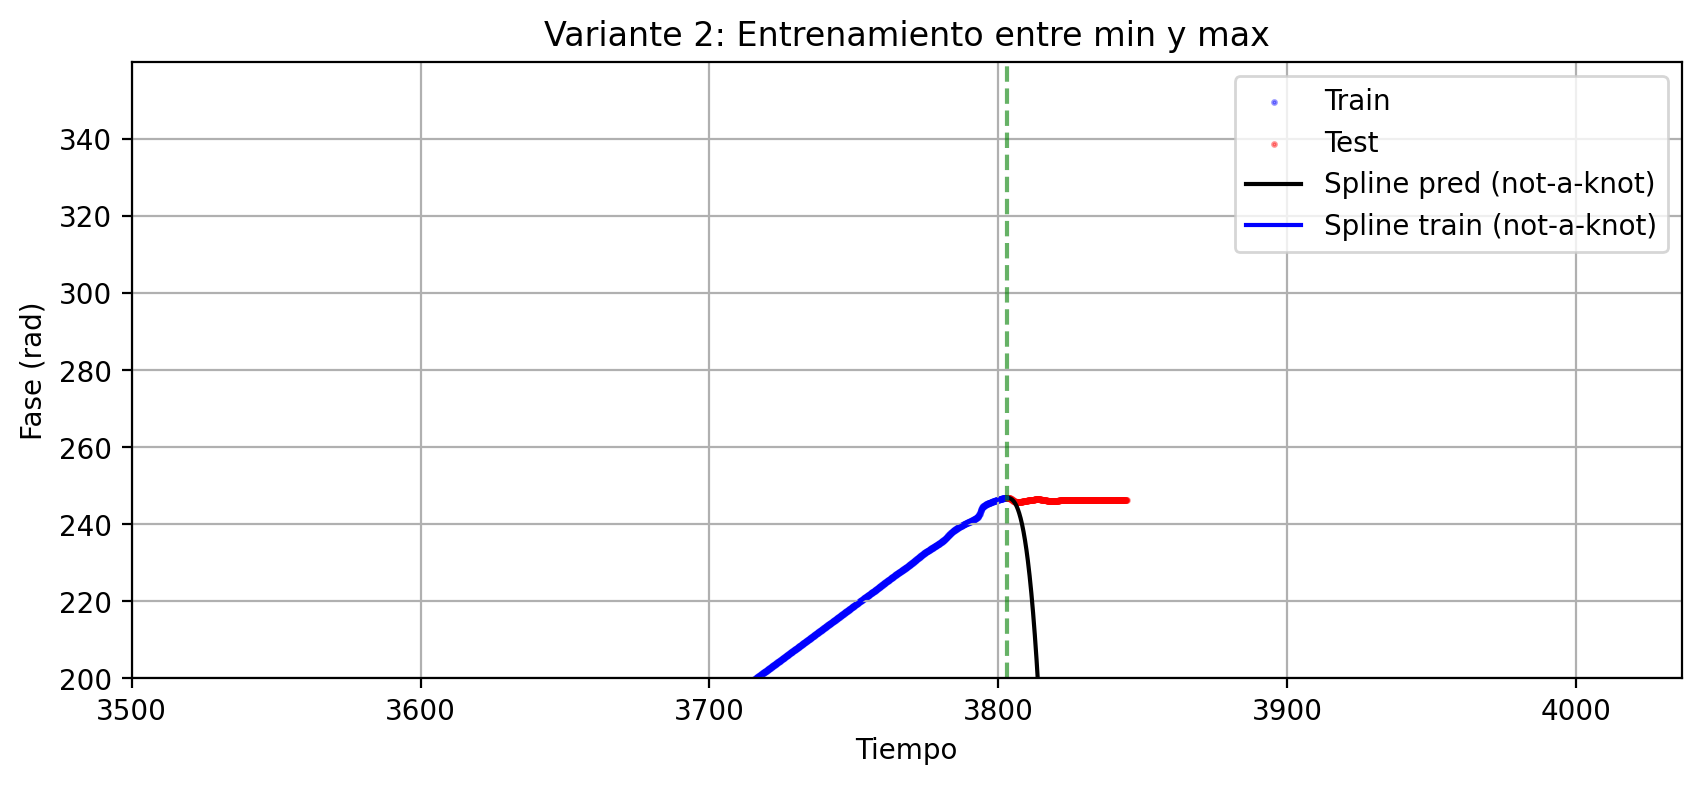


=== Variante 3: TimeSeriesSplit (último fold) ===
Train: 11455 | Test: 2291
MSE: 164.69361372335862
MAE: 9.450156369746304


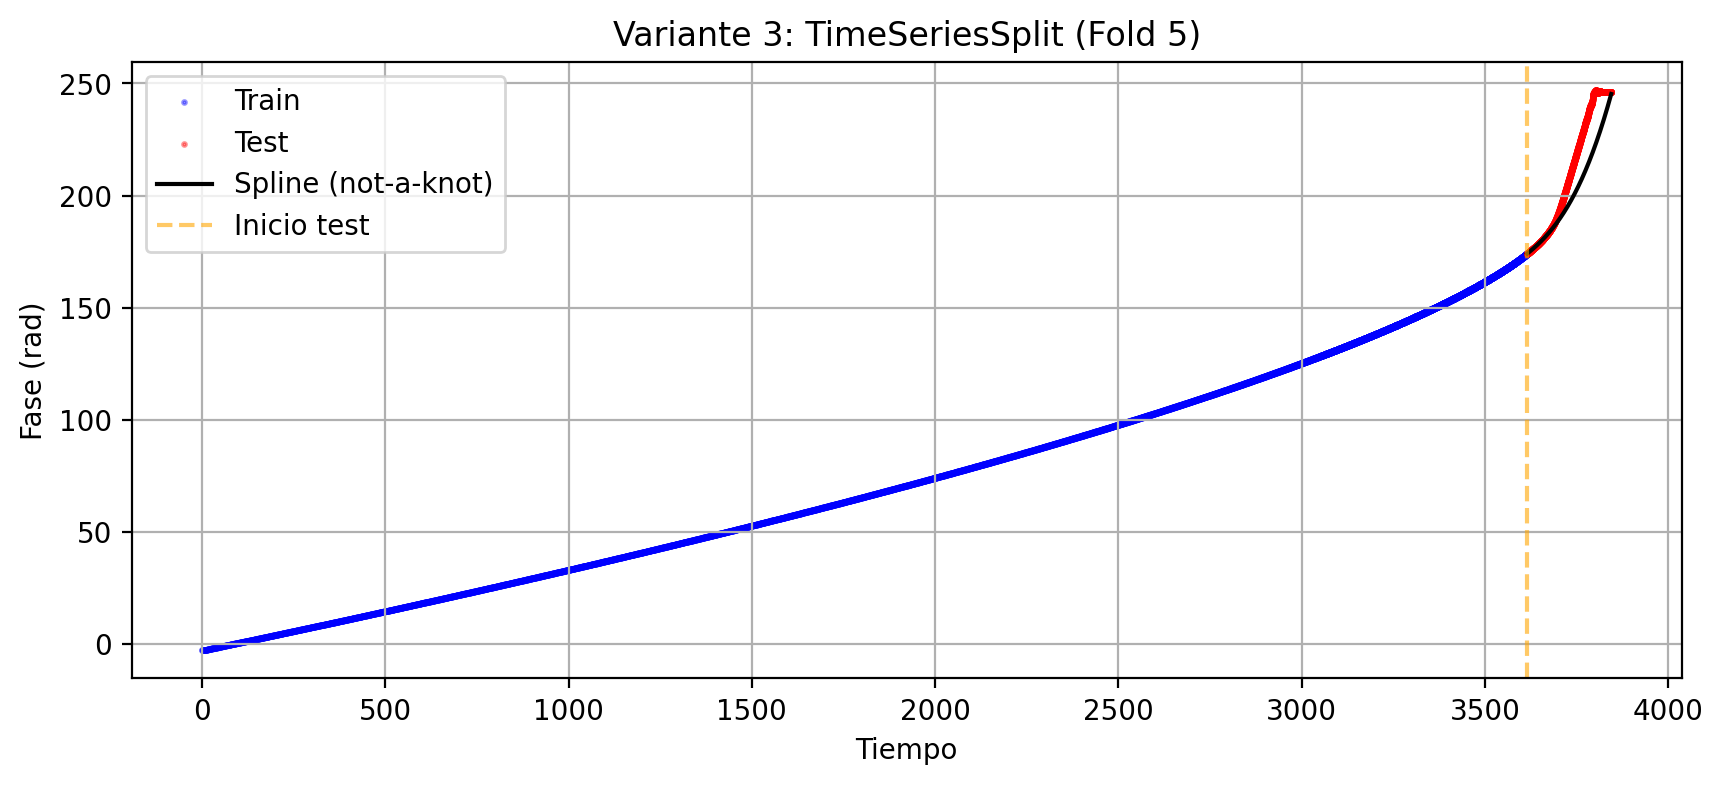

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, PchipInterpolator
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

# =========================
# Variante 1: Pares vs Impares
# =========================
x_train1 = time[0::2]
y_train1 = fase[0::2]
x_test1  = time[1::2]
y_test1  = fase[1::2]

cs1 = CubicSpline(x_train1, y_train1, bc_type="not-a-knot")
y_pred1 = cs1(x_test1)

print("=== Variante 1: Pares vs Impares ===")
print("Train:", len(x_train1), "| Test:", len(x_test1))
print("MSE:", mean_squared_error(y_test1, y_pred1))
print("MAE:", mean_absolute_error(y_test1, y_pred1))

plt.figure(figsize=(10, 4))
plt.scatter(x_train1, y_train1, s=2, alpha=0.4, label="Train", color='blue')
plt.scatter(x_test1, y_test1, s=2, alpha=0.4, label="Test", color='red')
plt.plot(x_test1, y_pred1, '-', color='black', label="Spline (not-a-knot)")
plt.xlabel("Tiempo")
plt.ylabel("Fase (rad)")
plt.title("Variante 1: Pares vs Impares")
plt.legend()
plt.xlim(3500,)
plt.ylim(200,)
plt.grid(True)
plt.show()

# =========================
# Variante 2: Entre min y max (idx)
# =========================
idx_min = np.argmin(fase)
idx_max = np.argmax(fase)
i_left  = min(idx_min, idx_max)
i_right = max(idx_min, idx_max)

x_train2 = time[i_left:i_right+1]
y_train2 = fase[i_left:i_right+1]
x_test2  = np.concatenate([time[:i_left], time[i_right+1:]])
y_test2  = np.concatenate([fase[:i_left], fase[i_right+1:]])

cs2 = CubicSpline(x_train2, y_train2, bc_type="not-a-knot")
y_pred2 = cs2(x_test2)

print("\n=== Variante 2: Entrenamiento entre min y max ===")
print("Train:", len(x_train2), "| Test:", len(x_test2))
print("MSE:", mean_squared_error(y_test2, y_pred2))
print("MAE:", mean_absolute_error(y_test2, y_pred2))

plt.figure(figsize=(10, 4))
plt.scatter(x_train2, y_train2, s=2, alpha=0.4, label="Train", color='blue')
plt.scatter(x_test2, y_test2, s=2, alpha=0.4, label="Test", color='red')
plt.plot(x_test2, y_pred2, '-', color='black', label="Spline pred (not-a-knot)")
plt.plot(x_train2, y_train2, '-', color='blue', label="Spline train (not-a-knot)")
plt.axvline(time[i_left], color='green', linestyle='--', alpha=0.6)
plt.axvline(time[i_right], color='green', linestyle='--', alpha=0.6)
plt.xlabel("Tiempo")
plt.ylabel("Fase (rad)")
plt.title("Variante 2: Entrenamiento entre min y max")
plt.legend()
plt.xlim(3500,)
plt.ylim(200,)
plt.grid(True)
plt.show()

# =========================
# Variante 3: TimeSeriesSplit (sin for, pero mostrando un fold)
# =========================
tscv = TimeSeriesSplit(n_splits=5)
splits = list(tscv.split(time))

# Selecciona el último fold para ejemplo (Fold 5)
train_idx, test_idx = splits[-1]

x_train3 = time[train_idx]
y_train3 = fase[train_idx]
x_test3 = time[test_idx]
y_test3 = fase[test_idx]

cs3 = CubicSpline(x_train3, y_train3, bc_type="not-a-knot")
y_pred3 = cs3(x_test3)

print("\n=== Variante 3: TimeSeriesSplit (último fold) ===")
print("Train:", len(x_train3), "| Test:", len(x_test3))
print("MSE:", mean_squared_error(y_test3, y_pred3))
print("MAE:", mean_absolute_error(y_test3, y_pred3))

plt.figure(figsize=(10, 4))
plt.scatter(x_train3, y_train3, s=2, alpha=0.4, label="Train", color='blue')
plt.scatter(x_test3, y_test3, s=2, alpha=0.4, label="Test", color='red')
plt.plot(x_test3, y_pred3, '-', color='black', label="Spline (not-a-knot)")
plt.axvline(x_test3[0], color='orange', linestyle='--', alpha=0.6, label="Inicio test")
plt.xlabel("Tiempo")
plt.ylabel("Fase (rad)")
plt.title("Variante 3: TimeSeriesSplit (Fold 5)")
plt.legend()
#plt.xlim(3500,)
#plt.ylim(200,)
plt.grid(True)
plt.show()

=== Variante 1: Pares vs Impares ===
Train: 6873 | Test: 6873
MSE: 3.421474276142404e-10
MAE: 8.38123147509769e-07


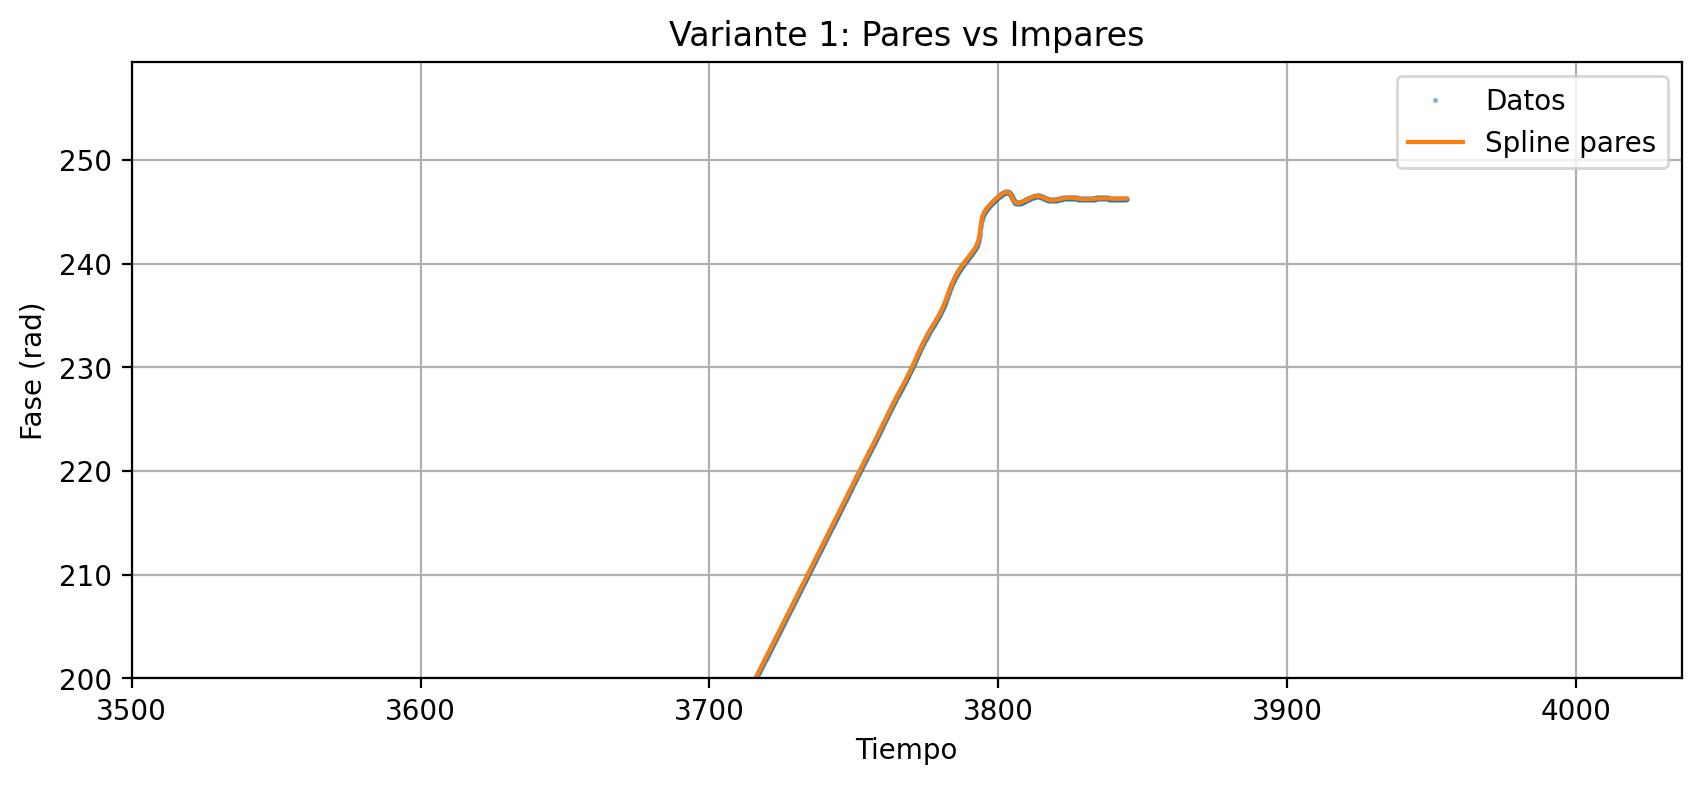


=== Variante 2: Usando idx (min/max) ===
Train: 13332 | Test: 414
MSE: 122389529.11906677
MAE: 7322.296907537547


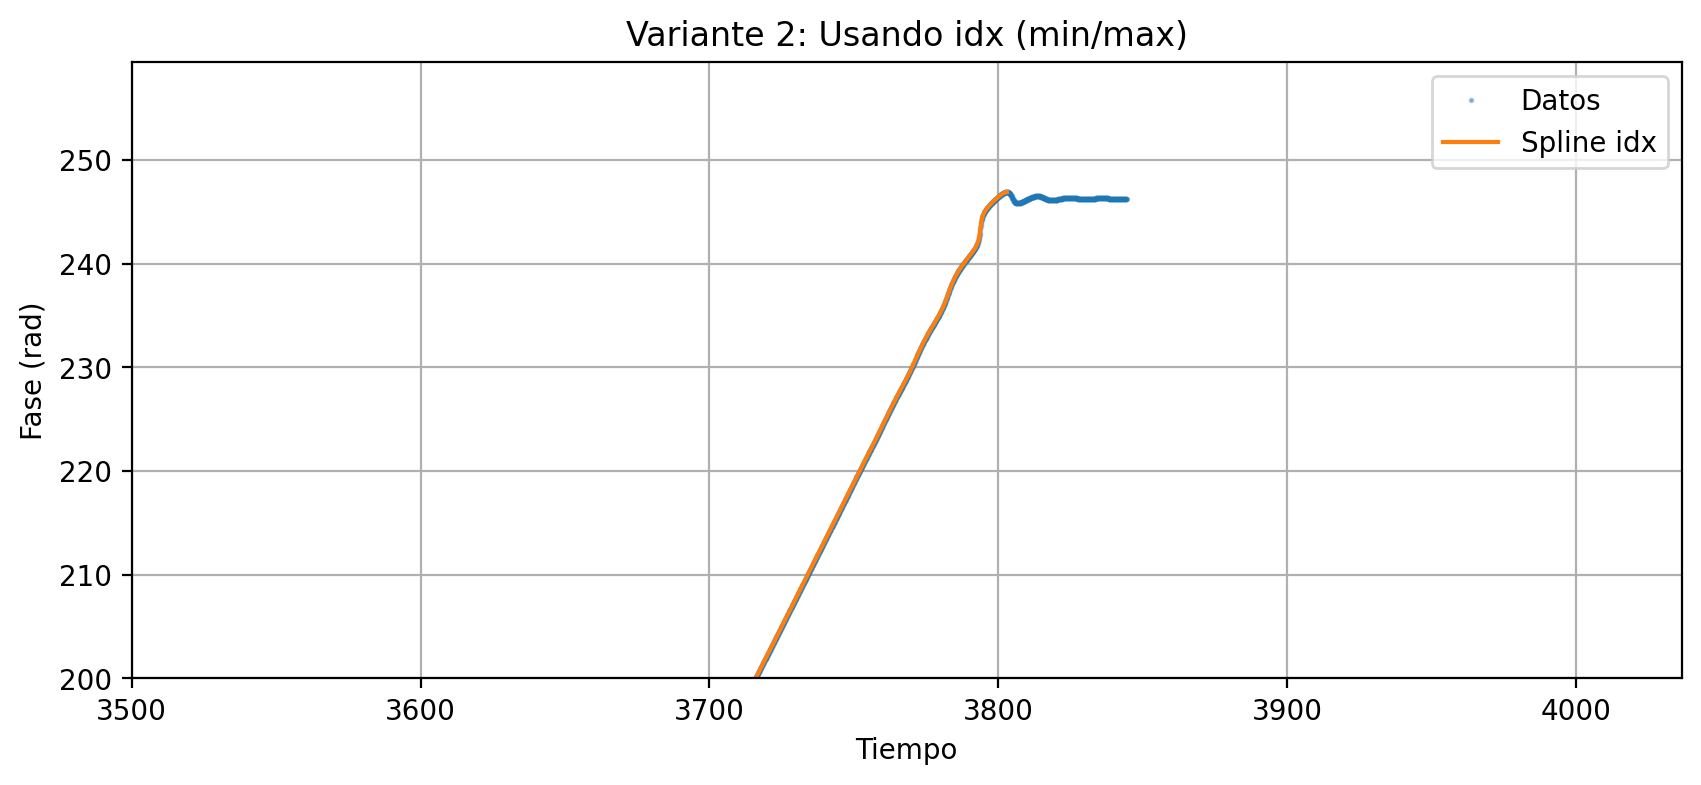


=== Variante 3: TimeSeriesSplit (Último Fold) ===
Train: 11455 | Test: 2291
MSE: 38731326.90841901
MAE: 4120.646927401657


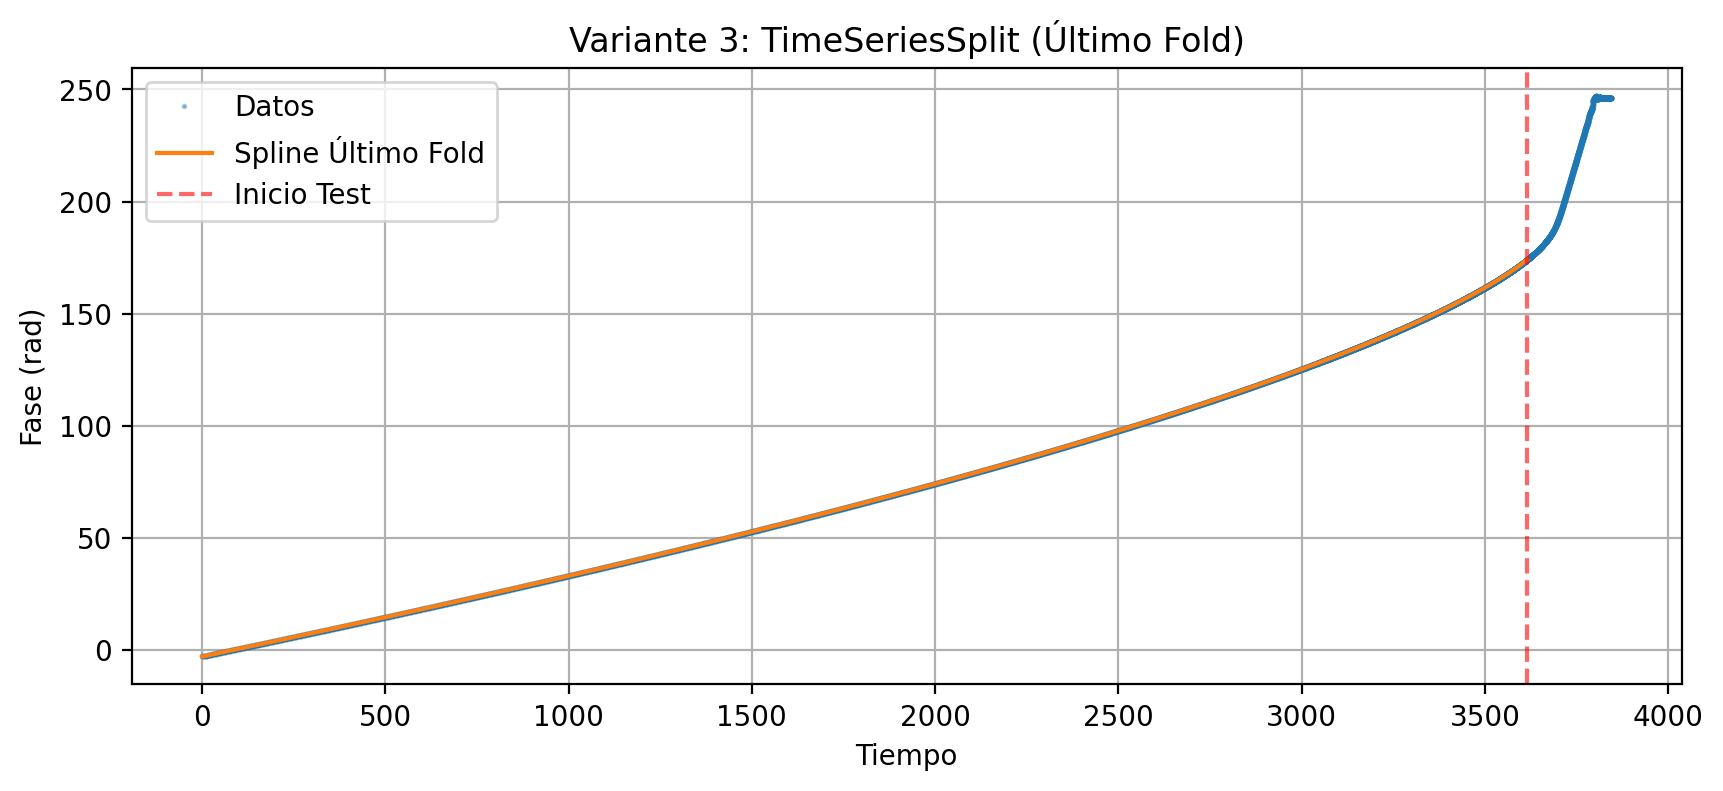

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

# ==========================================================
# Variante 1: Train = pares / Test = impares
# ==========================================================
x_train1 = time[0::2]
y_train1 = fase[0::2]
x_test1 = time[1::2]
y_test1 = fase[1::2]

cs1 = CubicSpline(x_train1, y_train1, bc_type="natural", extrapolate=True)
y_pred1 = cs1(x_test1)

print("=== Variante 1: Pares vs Impares ===")
print("Train:", len(x_train1), "| Test:", len(x_test1))
print("MSE:", mean_squared_error(y_test1, y_pred1))
print("MAE:", mean_absolute_error(y_test1, y_pred1))

plt.figure(figsize=(10,4))
plt.plot(time, fase, '.', markersize=2, alpha=0.4, label="Datos")
plt.plot(time, cs1(time), '-', label="Spline pares")
plt.xlabel("Tiempo")
plt.ylabel("Fase (rad)")
plt.title("Variante 1: Pares vs Impares")
plt.xlim(3500,)
plt.ylim(200,)
plt.legend()
plt.grid(True)
plt.show()

# ==========================================================
# Variante 2: Train = entre min y max (idx), Test = extremos
# ==========================================================
idx_max = np.argmax(fase)
idx_min = np.argmin(fase)
i_left = min(idx_max, idx_min)
i_right = max(idx_max, idx_min)

x_train2 = time[i_left:i_right+1]
y_train2 = fase[i_left:i_right+1]
x_test2 = np.concatenate([time[:i_left], time[i_right+1:]])
y_test2 = np.concatenate([fase[:i_left], fase[i_right+1:]])

cs2 = CubicSpline(x_train2, y_train2, bc_type="natural", extrapolate=True)
y_pred2 = cs2(x_test2)

print("\n=== Variante 2: Usando idx (min/max) ===")
print("Train:", len(x_train2), "| Test:", len(x_test2))
print("MSE:", mean_squared_error(y_test2, y_pred2))
print("MAE:", mean_absolute_error(y_test2, y_pred2))

plt.figure(figsize=(10,4))
plt.plot(time, fase, '.', markersize=2, alpha=0.4, label="Datos")
plt.plot(x_train2, cs2(x_train2), '-', label="Spline idx")
plt.xlabel("Tiempo")
plt.ylabel("Fase (rad)")
plt.title("Variante 2: Usando idx (min/max)")
plt.xlim(3500,)
plt.ylim(200,)
plt.legend()
plt.grid(True)
plt.show()

# ==========================================================
# Variante 3: TimeSeriesSplit (solo último fold)
# ==========================================================
tscv = TimeSeriesSplit(n_splits=5)  # puedes cambiar n_splits
splits = list(tscv.split(time))     # obtenemos todos los folds
train_idx, test_idx = splits[-1]    # seleccionamos solo el último fold

x_train3, x_test3 = time[train_idx], time[test_idx]
y_train3, y_test3 = fase[train_idx], fase[test_idx]

cs3 = CubicSpline(x_train3, y_train3, bc_type="natural", extrapolate=True)
y_pred3 = cs3(x_test3)

print(f"\n=== Variante 3: TimeSeriesSplit (Último Fold) ===")
print("Train:", len(x_train3), "| Test:", len(x_test3))
print("MSE:", mean_squared_error(y_test3, y_pred3))
print("MAE:", mean_absolute_error(y_test3, y_pred3))

plt.figure(figsize=(10,4))
plt.plot(time, fase, '.', markersize=2, alpha=0.4, label="Datos")
plt.plot(x_train3, cs3(x_train3), '-', label="Spline Último Fold")
plt.axvline(x_test3[0], color='r', linestyle='--', alpha=0.6, label="Inicio Test")
plt.xlabel("Tiempo")
plt.ylabel("Fase (rad)")
plt.title("Variante 3: TimeSeriesSplit (Último Fold)")
#plt.xlim(3500,)
#plt.ylim(200,)
plt.legend()
plt.grid(True)
plt.show()